In [1]:
## Importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
online_retail = fetch_ucirepo(id=352) 

df = online_retail.data.original
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Data Analysis

#### 1. Exploring Data

In [4]:
## length of df
len(df)

541909

In [5]:
## checking for null value, datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


- The Dtype of invoicedata and CustomerID should be changed
- CustomerID contains missing values

In [7]:
## checking the records with no customer_id
df[df['CustomerID'].isna()].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/2010 14:32,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,12/1/2010 14:32,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,12/1/2010 14:32,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,12/1/2010 14:32,0.43,NaN,United Kingdom


In [8]:
# converting invoice data to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%m/%d/%Y %H:%M')


In [9]:
df['Invoice_Time'] = df['InvoiceDate'].dt.time
df['Invoice_Date'] = df['InvoiceDate'].dt.date

In [10]:
# identifying cancellation invoices
df['InvoiceNo'] = df['InvoiceNo'].astype(str)
df[df['InvoiceNo'].str.match("^\\d{6}$") == False]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Time,Invoice_Date
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,09:41:00,2010-12-01
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,09:49:00,2010-12-01
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,10:24:00,2010-12-01
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,10:24:00,2010-12-01
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,10:24:00,2010-12-01
...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,09:57:00,2011-12-09
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,10:28:00,2011-12-09
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,11:57:00,2011-12-09
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,11:58:00,2011-12-09


In [11]:
df[df['Quantity'] < 0].shape

(10624, 10)

As we can see that, majority of the negative quantity are linked with the invoice that are cancelled. 

In [12]:
## Validating StockCode
df['StockCode'] = df['StockCode'].astype(str)
df[(df['StockCode'].str.match("^\\d{5}$") == False) & (df['StockCode'].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()

array(['POST', 'D', 'C2', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE',
       'DCGS0076', 'DCGS0003', 'gift_0001_40', 'DCGS0070', 'm',
       'gift_0001_50', 'gift_0001_30', 'gift_0001_20', 'DCGS0055',
       'DCGS0072', 'DCGS0074', 'DCGS0069', 'DCGS0057', 'DCGSSBOY',
       'DCGSSGIRL', 'gift_0001_10', 'PADS', 'DCGS0004', 'DCGS0073',
       'DCGS0071', 'DCGS0068', 'DCGS0067', 'DCGS0066P', 'B', 'CRUK'],
      dtype=object)

In [13]:
df[df['StockCode'].str.contains('^DOT')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Time,Invoice_Date
1814,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,NaN,United Kingdom,14:32:00,2010-12-01
3041,536592,DOT,DOTCOM POSTAGE,1,2010-12-01 17:06:00,607.49,NaN,United Kingdom,17:06:00,2010-12-01
5450,536862,DOT,DOTCOM POSTAGE,1,2010-12-03 11:13:00,254.43,NaN,United Kingdom,11:13:00,2010-12-03
5545,536864,DOT,DOTCOM POSTAGE,1,2010-12-03 11:27:00,121.06,NaN,United Kingdom,11:27:00,2010-12-03
5685,536865,DOT,DOTCOM POSTAGE,1,2010-12-03 11:28:00,498.47,NaN,United Kingdom,11:28:00,2010-12-03
...,...,...,...,...,...,...,...,...,...,...
536834,581219,DOT,DOTCOM POSTAGE,1,2011-12-08 09:28:00,1008.96,NaN,United Kingdom,09:28:00,2011-12-08
537254,581238,DOT,DOTCOM POSTAGE,1,2011-12-08 10:53:00,1683.75,NaN,United Kingdom,10:53:00,2011-12-08
539368,581439,DOT,DOTCOM POSTAGE,1,2011-12-08 16:30:00,938.59,NaN,United Kingdom,16:30:00,2011-12-08
540908,581492,DOT,DOTCOM POSTAGE,1,2011-12-09 10:03:00,933.17,NaN,United Kingdom,10:03:00,2011-12-09


#### 2. Profiling Data

In [14]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [15]:
### Calculating Basket size statistics
basket_stats = df.groupby(by="InvoiceNo").agg(
    item_count=('StockCode', 'nunique'),
    total_quantity=('Quantity','sum'),
    total_price=('TotalPrice','sum')
)
basket_stats = basket_stats[(basket_stats['total_quantity']>0) & (basket_stats['total_price']>0)]
basket_stats

,item_count,total_quantity,total_price
InvoiceNo,,,
536365,7,40,139.12
536366,2,12,22.20
536367,12,83,278.73
536368,4,15,70.05
536369,1,3,17.85
...,...,...,...
581584,2,120,140.64
581585,21,278,329.05
581586,4,66,339.20


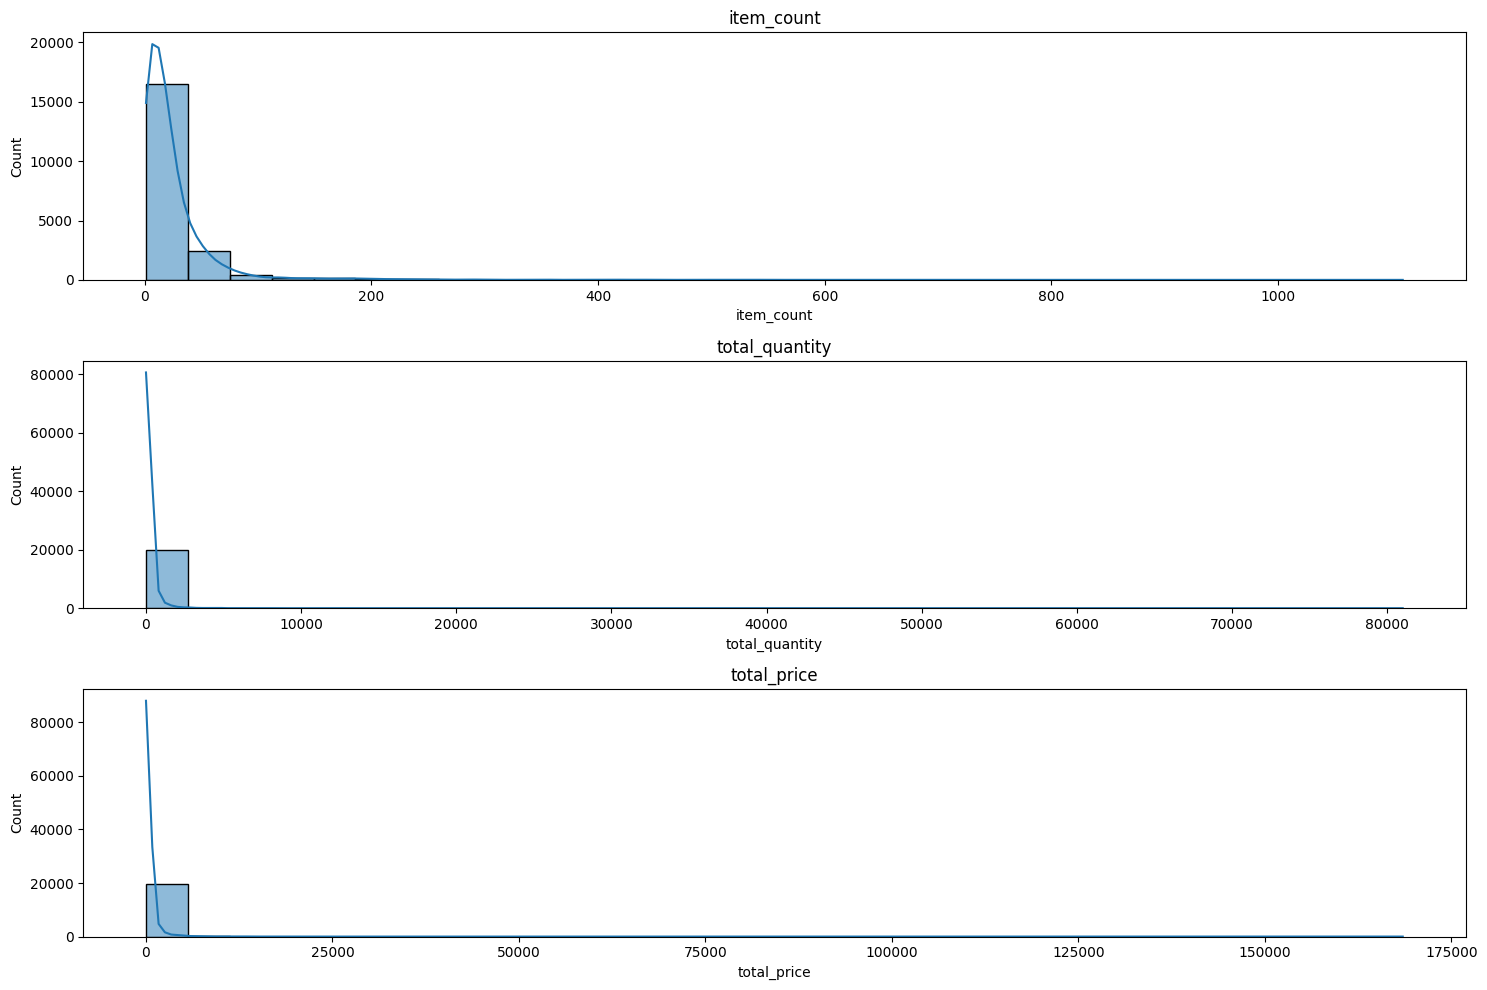

In [16]:
## Basket Size Distribution by quantity
cols = basket_stats.columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols):
    plt.subplot(3, 1, i+1)
    sns.histplot(basket_stats[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

In [17]:
## Revenue and Sales Distribution by Product
top_revenue_product = df.groupby('Description')['TotalPrice'].sum().nlargest(10)
top_sales_product = df.groupby('Description')['Quantity'].sum().nlargest(10)

In [18]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}k"
    else:
        return str(value)

In [19]:
top_revenue_product.apply(lambda x: format_dollars(x))
top_revenue_product

Description
DOTCOM POSTAGE                        206245.48
REGENCY CAKESTAND 3 TIER              164762.19
WHITE HANGING HEART T-LIGHT HOLDER     99668.47
PARTY BUNTING                          98302.98
JUMBO BAG RED RETROSPOT                92356.03
RABBIT NIGHT LIGHT                     66756.59
POSTAGE                                66230.64
PAPER CHAIN KIT 50'S CHRISTMAS         63791.94
ASSORTED COLOUR BIRD ORNAMENT          58959.73
CHILLI LIGHTS                          53768.06
Name: TotalPrice, dtype: float64

In [20]:
top_sales_product.apply(lambda x: format_dollars(x))
top_sales_product

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
JUMBO BAG RED RETROSPOT               47363
ASSORTED COLOUR BIRD ORNAMENT         36381
POPCORN HOLDER                        36334
PACK OF 72 RETROSPOT CAKE CASES       36039
WHITE HANGING HEART T-LIGHT HOLDER    35317
RABBIT NIGHT LIGHT                    30680
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26315
PACK OF 60 PINK PAISLEY CAKE CASES    24753
Name: Quantity, dtype: int64

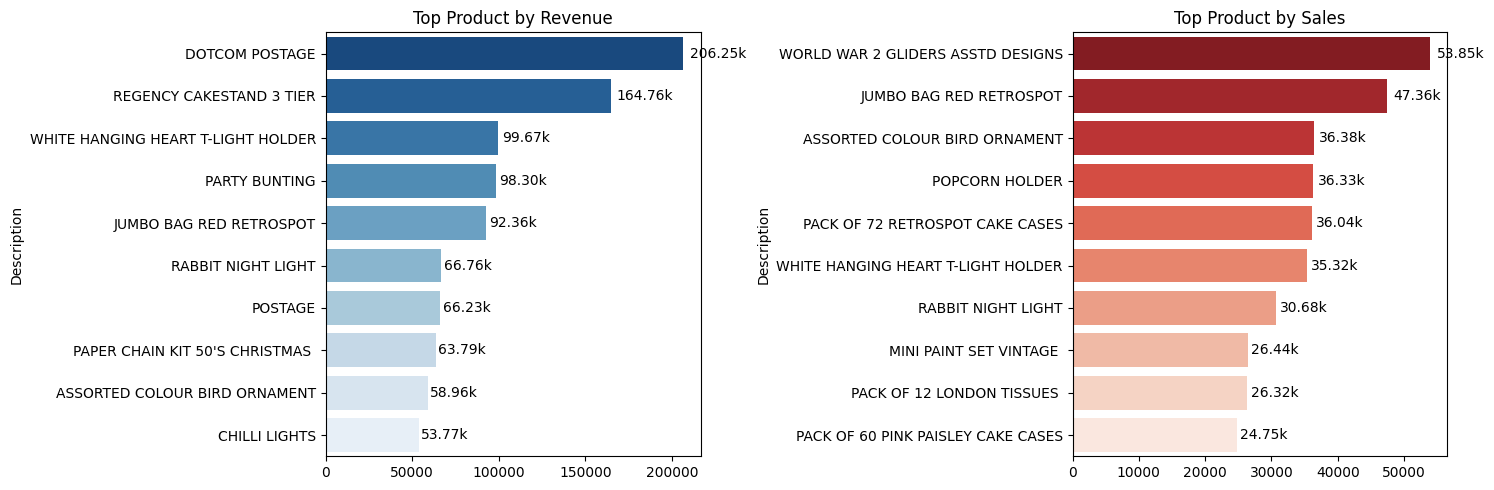

In [21]:
plt.figure(figsize=(15,5))

# Plot for Top Product by Revenue 
plt.subplot(1,2,1)
ax1 = sns.barplot(y=top_revenue_product.index, x=top_revenue_product.values, palette="Blues_r")
plt.title("Top Product by Revenue")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')   
    
# Plot for Top Product by Sales 
plt.subplot(1,2,2)
ax2 = sns.barplot(y=top_sales_product.index, x=top_sales_product.values, palette="Reds_r")
plt.title("Top Product by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')   

plt.tight_layout()
plt.show()
                  

In [22]:
## Order frequency by day of week and hour
df['Invoice_day'] = df['InvoiceDate'].dt.day_name()
df['Invoice_hour'] = df['InvoiceDate'].dt.hour
df['Invoice_day_of_week'] = df['InvoiceDate'].dt.day_of_week


In [23]:
## Order frequency by day of week
order_by_dayWeek = df.groupby('Invoice_day').agg(
    total_quantity=('Quantity','sum'),
).reset_index()
map_week = {
    'Monday':'0',
    'Tuesday':'1',
    'Wednesday':'2',
    'Thursday':'3',
    'Friday':'4',
    'Sunday':'6'
}
order_by_dayWeek['WeekNumber'] = order_by_dayWeek['Invoice_day'].map(map_week)
 

In [24]:
order_by_dayWeek.sort_values('WeekNumber', ascending=True)

,Invoice_day,total_quantity,WeekNumber
1,Monday,815354,0
4,Tuesday,961543,1
5,Wednesday,969558,2
3,Thursday,1167823,3
0,Friday,794440,4
2,Sunday,467732,6


In [25]:
order_by_dayWeek['Order_Contribution%'] = round(order_by_dayWeek['total_quantity']/sum(order_by_dayWeek['total_quantity']) * 100,2)

In [26]:
order_by_dayWeek

,Invoice_day,total_quantity,WeekNumber,Order_Contribution%
0,Friday,794440,4,15.35
1,Monday,815354,0,15.75
2,Sunday,467732,6,9.04
3,Thursday,1167823,3,22.56
4,Tuesday,961543,1,18.58
5,Wednesday,969558,2,18.73


In [27]:
days_name = list(order_by_dayWeek['Invoice_day'].values)
days_of_week_contributions = list(order_by_dayWeek['Order_Contribution%'].values)
total_contribution = round(sum(days_of_week_contributions),0)

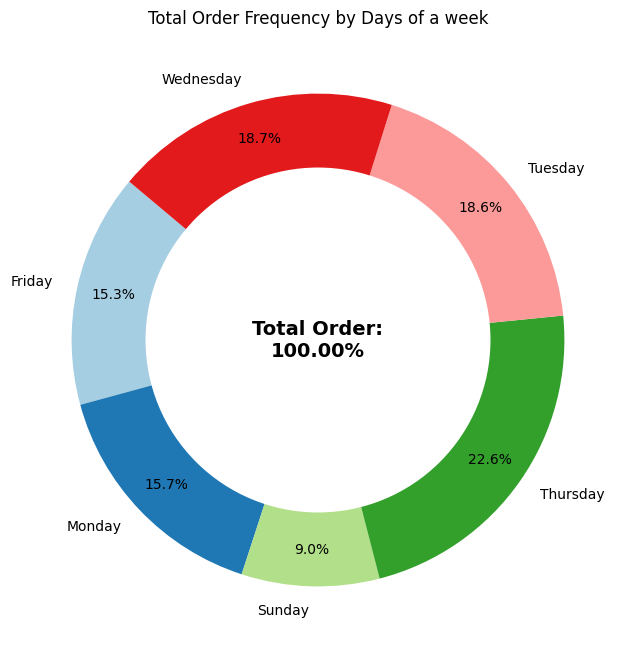

In [28]:
fig, ax = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax.pie(days_of_week_contributions, labels=days_name, autopct='%1.1f%%',
                                 startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Draw a white circle in the center to create a "donut" effect
center_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(center_circle)

# Add Total Contribution annotation in the center
plt.text(0,0, f"Total Order:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Total Order Frequency by Days of a week")
plt.show()

In [29]:
## Order frequency by hour
order_by_hour = df.groupby('Invoice_hour').agg(
    total_quantity=('Quantity','sum'),
).reset_index()

In [30]:
order_by_hour

,Invoice_hour,total_quantity
0,6,-86
1,7,15361
2,8,158163
3,9,429366
4,10,684416
5,11,637672
6,12,823935
7,13,676803
8,14,571549
9,15,609710


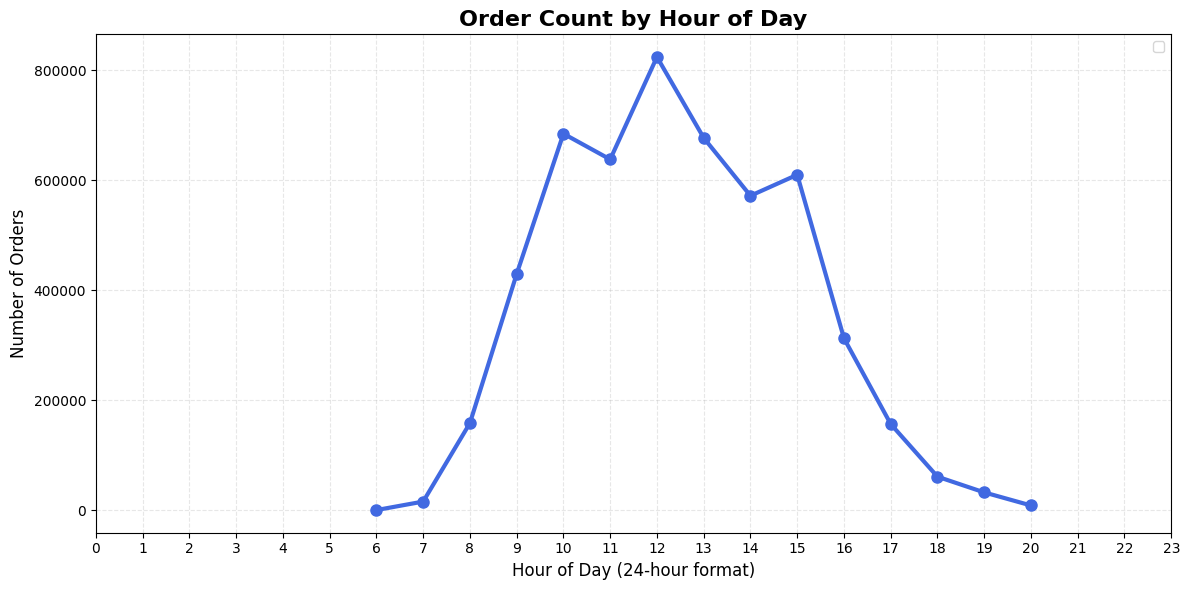

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(order_by_hour['Invoice_hour'], order_by_hour['total_quantity'], 
         marker='o', linewidth=3, markersize=8, color='royalblue')

# Customize
plt.title('Order Count by Hour of Day', fontsize=16, fontweight='bold')
plt.xlabel('Hour of Day (24-hour format)', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3, linestyle='--')

plt.legend()

plt.tight_layout()
plt.show()

### 3. Cleaning Data

In [32]:
df_cleaning = df.copy()

In [35]:
## Checking for null values
df_cleaning.isna().sum()

InvoiceNo                   0
StockCode                   0
Description              1454
Quantity                    0
InvoiceDate                 0
UnitPrice                   0
CustomerID             135080
Country                     0
Invoice_Time                0
Invoice_Date                0
TotalPrice                  0
Invoice_day                 0
Invoice_hour                0
Invoice_day_of_week         0
dtype: int64

In [46]:
### Removing cancelled invoices
df_cleaning = df_cleaning[~df_cleaning['InvoiceNo'].str.startswith('C')]

In [52]:
### Removing returned products
df_cleaning = df_cleaning[df_cleaning['Quantity'] > 0]

In [58]:
### Removing stock code that are non product : POST, D, M, BANK CHARGES
mask = (
    (df_cleaning["StockCode"].str.match("^\\d{5}$") == True)
    | (df_cleaning["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True)
    | (df_cleaning["StockCode"].str.match("^PADS$") == True)
)

df_cleaning = df_cleaning[mask]

In [61]:
len(df_cleaning)

528890

After cleaning the data, we dropped around 2.40% of data which can be considered.